# DESC: Plot select crime in Los Angeles, 2010 - Jan 2019
## CAUTION: Script is work in progess. No warranties of any kind are provided


In [39]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import datetime
import plotly 
import warnings
warnings.filterwarnings('ignore')

In [40]:
print(plotly.__version__)

3.6.1


In [41]:
print(mpl.__version__)

3.0.2


In [42]:
file_out_data='Resources/Crime_month_data.csv'

## Data wrangling 

In [43]:
file_out_data='Resources/Crime_month_data.csv'
csv_in = 'Resources/Crime_Data_from_2010_to_Present.csv'
# Read in first 100,000 rows
df = pd.read_csv(csv_in, encoding='utf8', parse_dates=['Date Occurred'])#,nrows=10000)
# Define date field
dt_field = 'Date Occurred'

In [44]:
# Convert column to date time
df[dt_field] = pd.to_datetime(df[dt_field])
# Create field of month
df['month'] = df['Date Occurred'].dt.strftime('%b')

df.head()

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,month
0,151521112,11/04/2015,2015-11-03,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)",Nov
1,151521113,11/04/2015,2015-10-30,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,0344 1609 1307,...,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)",Oct
2,151521117,11/04/2015,2015-11-04,1400,NaN,N Hollywood,1506,930,CRIMINAL THREATS - NO WEAPON DISPLAYED,0421,...,JA,Juv Arrest,930.0,NaN,NaN,NaN,7300 BAKMAN AV,NaN,"(34.203, -118.3779)",Nov
3,151521121,11/04/2015,2015-04-28,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",2000 0429 1241 0416 0400 0527 1813 2002,...,AO,Adult Other,121.0,NaN,NaN,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)",Apr
4,151521123,11/05/2015,2015-10-27,600,NaN,N Hollywood,1515,354,THEFT OF IDENTITY,0100 1822,...,IC,Invest Cont,354.0,NaN,NaN,NaN,11700 LEMAY ST,NaN,"(34.1912, -118.3891)",Oct


## Serious Crime: AGGRAVATED, MURDER, RAPE, BURGLARY, LARCENY, VEHICLE THEFT,ARSON, 273.5, BTFV/TFMV, GRAND THEFT AUTO

In [45]:

# Define query ensuring date format below and
# Select where crime code description contains defined words
query = (df[dt_field] >= '01-01-2010') & (df[dt_field] <= '01-31-2019')&\
    (df['Crime Code Description'].str.contains('AGGRAVATED|MURDER|RAPE|BURGLARY|LARCENY|VEHICLE THEFT|ARSON|273.5|BTFV/TFMV|GRAND THEFT AUTO'))
# Convert to expected value
query=df.loc[query]


query.head()


,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Reporting District,Crime Code,Crime Code Description,MO Codes,...,Status Code,Status Description,Crime Code 1,Crime Code 2,Crime Code 3,Crime Code 4,Address,Cross Street,Location,month
0,151521112,11/04/2015,2015-11-03,2230,NaN,N Hollywood,1555,330,BURGLARY FROM VEHICLE,0344,...,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CAMARILLO ST,NaN,"(34.1577, -118.3727)",Nov
1,151521113,11/04/2015,2015-10-30,200,NaN,N Hollywood,1548,330,BURGLARY FROM VEHICLE,0344 1609 1307,...,IC,Invest Cont,330.0,NaN,NaN,NaN,11100 CHANDLER BL,NaN,"(34.1681, -118.3724)",Oct
3,151521121,11/04/2015,2015-04-28,2125,NaN,N Hollywood,1567,121,"RAPE, FORCIBLE",2000 0429 1241 0416 0400 0527 1813 2002,...,AO,Adult Other,121.0,NaN,NaN,NaN,10700 LANDALE ST,NaN,"(34.1513, -118.3642)",Apr
18,151521159,11/05/2015,2015-11-04,2130,NaN,N Hollywood,1583,310,BURGLARY,0344,...,IC,Invest Cont,310.0,NaN,NaN,NaN,4100 TROOST AV,NaN,"(34.1429, -118.3865)",Nov
22,151521166,11/05/2015,2015-11-05,1800,NaN,N Hollywood,1548,230,"ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT",1218 2004 1414 0416,...,AA,Adult Arrest,230.0,NaN,NaN,NaN,MAGNOLIA BL,TUJUNGA AV,"(34.1649, -118.379)",Nov


In [46]:


query.to_csv(file_out_data, mode='w',index=False)



# Run from here
### After defining file_out_data variable, run cells below (to reduce time spent in notebook)

In [47]:
dfnew= pd.read_csv(file_out_data)
# Set the index

dfnew.set_index(pd.DatetimeIndex(dfnew['Date Occurred']), inplace=True)
# Define as date time
dfnew['YearMonth'] = pd.to_datetime(dfnew['Date Occurred']).map(lambda dt: dt.replace(day=1))
# Create year month data
dfnew['YM'] = dfnew['YearMonth'].apply(lambda x: x.strftime('%Y-%m'))   

# Count events by year month
res = dfnew['YM'].value_counts()

val=res.to_csv("Resources/crime_output.csv")
Cov = pd.read_csv("Resources/crime_output.csv", sep=',', names = ["YearMonth", "Count"])
Cov['YearMonth'] = pd.to_datetime(Cov['YearMonth'])
Cov['year'] = pd.DatetimeIndex(Cov['YearMonth']).year
Cov['month'] = pd.DatetimeIndex(Cov['YearMonth']).month
Cov['monthstr'] = Cov['YearMonth'].dt.strftime('%b')

#df.sort(columns=[...]) 
Cov.to_csv("Resources/crime_output.csv", encoding='utf-8', index=False)
Cov = pd.read_csv("Resources/crime_output.csv")
Cov.head()

,YearMonth,Count,year,month,monthstr
0,2017-10-01,4595,2017,10,Oct
1,2018-12-01,4391,2018,12,Dec
2,2017-12-01,4377,2017,12,Dec
3,2017-01-01,4329,2017,1,Jan
4,2017-07-01,4325,2017,7,Jul


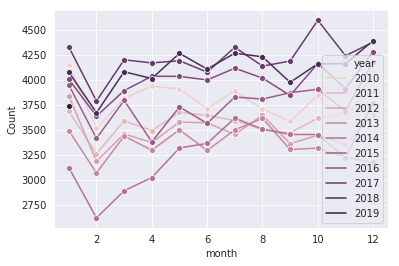

In [48]:
# x is month
# y is count
# hue is year
g = sns.lineplot(x='month', y='Count', hue='year',data=Cov,legend="full", marker='o')

### Cleaning up plot

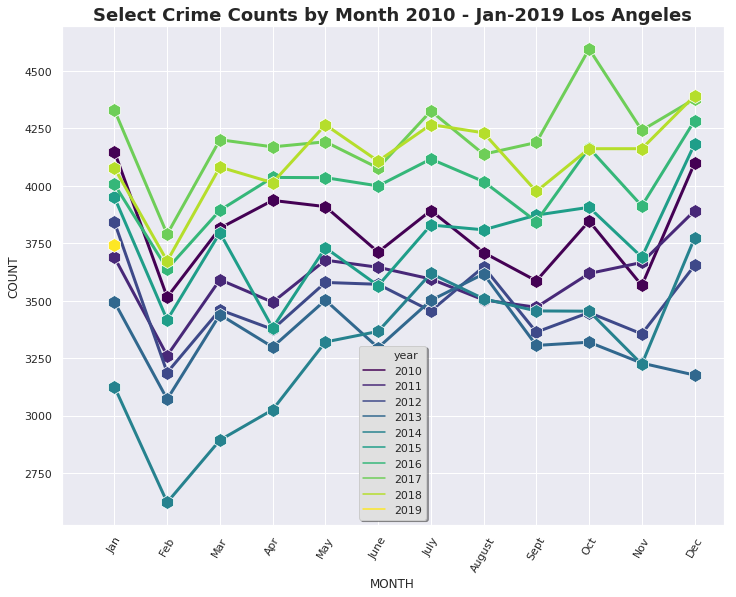

In [75]:
palette = sns.color_palette("mako_r", 6)
# plot
sns.set_style("darkgrid")
#sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
#sns.set(font_scale=2)
fig.set_size_inches(11.7, 8.27)


sns.set_style("darkgrid", {"axes.facecolor": ".9"})
g = sns.lineplot(x='month', y='Count', hue='year',data=Cov,legend="full",markersize=14, marker="h",linewidth=3, palette= 'viridis')
plt.xticks(rotation=60)
# N is count of x values
N = 13
# the x locations for the groups
ind = np.arange(N) 
# Set x tick labels
plt.xticks(ind, ('','Jan','Feb','Mar','Apr','May','June', 'July', 'August', 'Sept', 'Oct', 'Nov', 'Dec'))
# Put the legend out of the figure
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.tight_layout()
plt.title('Select Crime Counts by Month 2010 - Jan-2019 Los Angeles',y=1.18,fontsize=18,weight=800)
plt.ylabel('COUNT')
plt.xlabel('MONTH')
lgnd=plt.legend(loc=8, labelspacing=0.5,shadow=True,frameon=True)
frame = lgnd.get_frame()
frame.set_facecolor('#e0e0e0')

fname='Resources/crime_select.png'
# output file
plt.savefig(fname,bbox_inches="tight",dpi=300)



# Set as Plotly Plot
## Must provide user name and password

In [76]:
# Learn about API authentication here: https://plot.ly/pandas/getting-started
# Find your api_key here: https://plot.ly/settings/api
# Cufflinks binds plotly to pandas dataframes in IPython notebook. Read more
import plotly.plotly as py
import plotly.tools as tls
import numpy as np
import cufflinks as cf

plotly.tools.set_credentials_file(username=username, api_key=api_key)
fig = ax.get_figure()

plotly_fig = tls.mpl_to_plotly( fig )
plot_url = py.plot(plotly_fig, filename='crimeline 2010-2018')

py.iplot(plotly_fig, filename='mpl-linestyles-police')

In [78]:
import plotly.plotly as py
import plotly.graph_objs as go
plotly.tools.set_credentials_file(username=username, api_key=api_key)
df = pd.read_csv("Resources/crime_output.csv")
df = pd.DataFrame(df)
# Create random data with numpy
import numpy as np
# Create traces
trace0= go.Scatter(
    x =df['YearMonth'],
    y = df['Count'],
    mode = 'markers',
    name = 'markers',
    
    marker = dict(
        size = 10,
        color = 'rgba(255, 182, 193, .9)',
        line = dict(
            width = 2,
        )
    )

)

data = [trace0]
fig = go.Figure(data=data)
plot_url = py.plot(fig, filename='crime 2010-2018')
py.iplot(data)
